In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
redwine=pd.read_csv("winequality-red.csv", header=0, sep=";")

In [3]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
redwine.quality.sort_values(ascending=True).unique()

array([3, 4, 5, 6, 7, 8], dtype=int64)

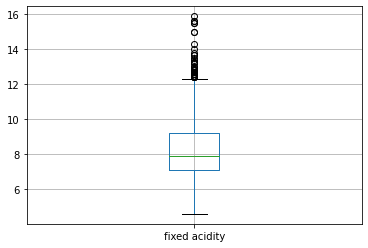

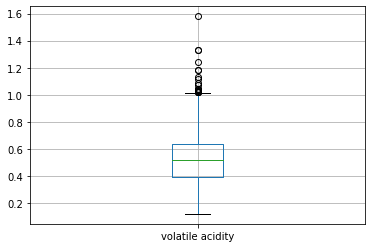

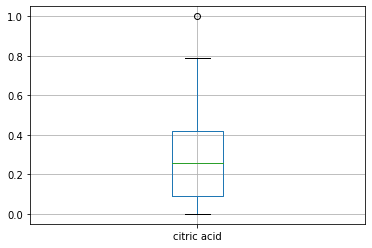

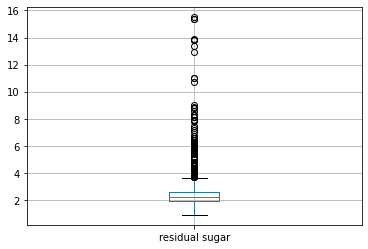

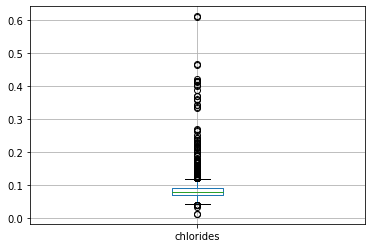

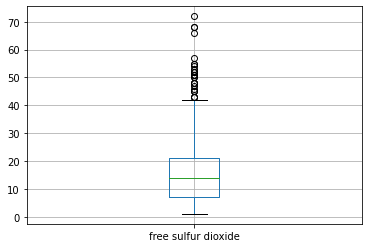

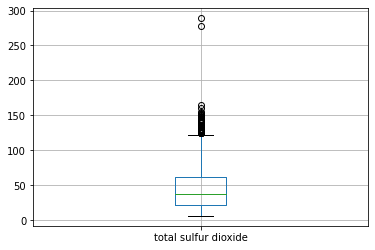

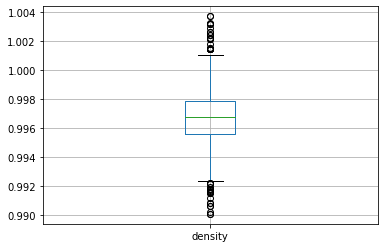

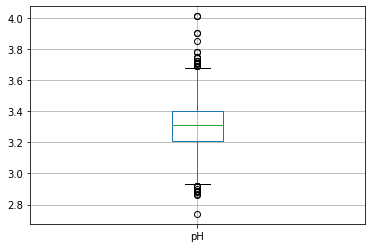

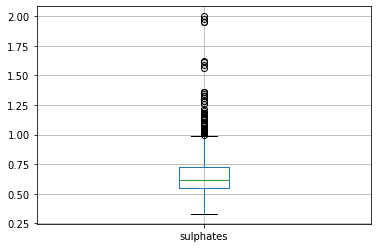

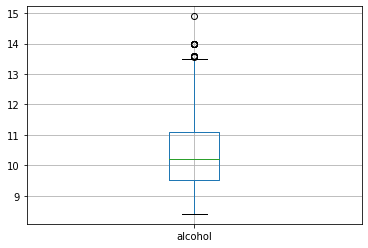

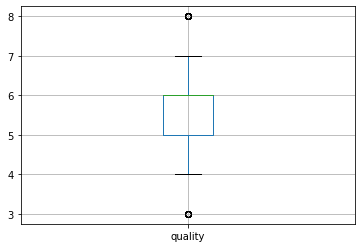

In [7]:
for x in redwine.columns:
    redwine.boxplot(column=x)
    plt.show()

In [8]:
redwine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

(1599, 12)
(0, 12)
0.049999999999998046
8
(1599, 12)


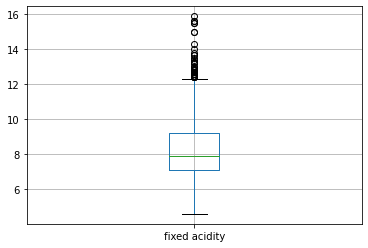

In [9]:
#for value in colname:
q1 = redwine["fixed acidity"].quantile(0.25)
q3 = redwine["fixed acidity"].quantile(0.95)
iqr = q3-q1
low  = q1-1.5*iqr
high = q3+1.5*iqr

redwine_include = redwine.loc[(redwine["fixed acidity"] >= low) & \
                                (redwine["fixed acidity"] <= high)] # meeting the acceptable range
redwine_exclude = redwine.loc[(redwine["fixed acidity"] < low) | (redwine["fixed acidity"] > high)] #not meeting the acceptable range

print(redwine_include.shape)
print(redwine_exclude.shape)

print(low)

fixed_acidity_mean=int(redwine_include["fixed acidity"].mean()) #finding the mean of the acceptable range
print(fixed_acidity_mean)

#imputing outlier values with mean value
redwine_exclude["fixed acidity"]=fixed_acidity_mean

#getting back the original shape of df
redwine1=pd.concat([redwine_include, redwine_exclude], axis=0) #concatenating both dfs to get 
#the original shape
print(redwine1.shape)

redwine1.boxplot(column="fixed acidity")
plt.show()

(1463, 12)
(136, 12)
0.6999999999999995
2
(1599, 12)


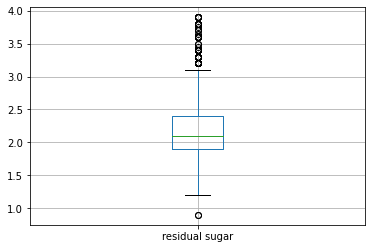

In [10]:
#for value in colname:
q1 = redwine1["residual sugar"].quantile(0.25)
q3 = redwine1["residual sugar"].quantile(0.80)
iqr = q3-q1
low  = q1-1.5*iqr
high = q3+1.5*iqr

redwine1_include = redwine1.loc[(redwine1["residual sugar"] >= low) & \
                                (redwine1["residual sugar"] <= high)] # meeting the acceptable range
redwine1_exclude = redwine1.loc[(redwine1["residual sugar"] < low) | (redwine1["residual sugar"] > high)] #not meeting the acceptable range

print(redwine1_include.shape)
print(redwine1_exclude.shape)

print(low)

residual_sugar_mean=int(redwine1_include["residual sugar"].mean()) #finding the mean of the acceptable range
print(residual_sugar_mean)

#imputing outlier values with mean value
redwine1_exclude["residual sugar"]=residual_sugar_mean

#getting back the original shape of df
redwine2=pd.concat([redwine1_include, redwine1_exclude], axis=0) #concatenating both dfs to get 
#the original shape
print(redwine2.shape)

redwine2.boxplot(column="residual sugar")
plt.show()

(1571, 12)
(28, 12)
-0.07555
0
(1599, 12)


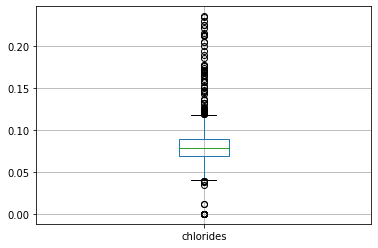

In [11]:
#for value in colname:
q1 = redwine2["chlorides"].quantile(0.01)
q3 = redwine2["chlorides"].quantile(0.94)
iqr = q3-q1
low  = q1-1.5*iqr
high = q3+1.5*iqr

redwine2_include = redwine2.loc[(redwine2["chlorides"] >= low) & \
                                (redwine2["chlorides"] <= high)] # meeting the acceptable range
redwine2_exclude = redwine2.loc[(redwine2["chlorides"] < low) | (redwine2["chlorides"] > high)] #not meeting the acceptable range

print(redwine2_include.shape)
print(redwine2_exclude.shape)

print(low)

chlorides_mean=int(redwine2_include["chlorides"].mean()) #finding the mean of the acceptable range
print(chlorides_mean)

#imputing outlier values with mean value
redwine2_exclude["chlorides"]=chlorides_mean

#getting back the original shape of df
redwine3=pd.concat([redwine2_include, redwine2_exclude], axis=0) #concatenating both dfs to get 
#the original shape
print(redwine3.shape)

redwine3.boxplot(column="chlorides")
plt.show()

(1581, 12)
(18, 12)
-56.0
45
(1599, 12)


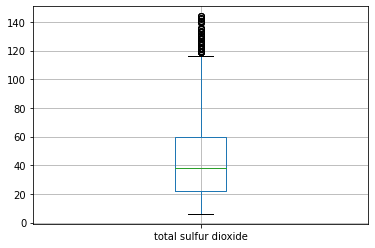

In [12]:
#for value in colname:
q1 = redwine3["total sulfur dioxide"].quantile(0.20)
q3 = redwine3["total sulfur dioxide"].quantile(0.80)
iqr = q3-q1
low  = q1-1.5*iqr
high = q3+1.5*iqr

redwine3_include = redwine3.loc[(redwine3["total sulfur dioxide"] >= low) & \
                                (redwine3["total sulfur dioxide"] <= high)] # meeting the acceptable range
redwine3_exclude = redwine3.loc[(redwine3["total sulfur dioxide"] < low) | (redwine3["total sulfur dioxide"] > high)] #not meeting the acceptable range

print(redwine3_include.shape)
print(redwine3_exclude.shape)

print(low)

total_sulfur_dioxide_mean=int(redwine3_include["total sulfur dioxide"].mean()) #finding the mean of the acceptable range
print(total_sulfur_dioxide_mean)

#imputing outlier values with mean value
redwine3_exclude["total sulfur dioxide"]=total_sulfur_dioxide_mean

#getting back the original shape of df
redwine_rev=pd.concat([redwine3_include, redwine3_exclude], axis=0) #concatenating both dfs to get 
#the original shape
print(redwine_rev.shape)

redwine_rev.boxplot(column="total sulfur dioxide")
plt.show()

In [13]:
redwine_rev.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
redwine_rev.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [15]:
redwine_rev.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

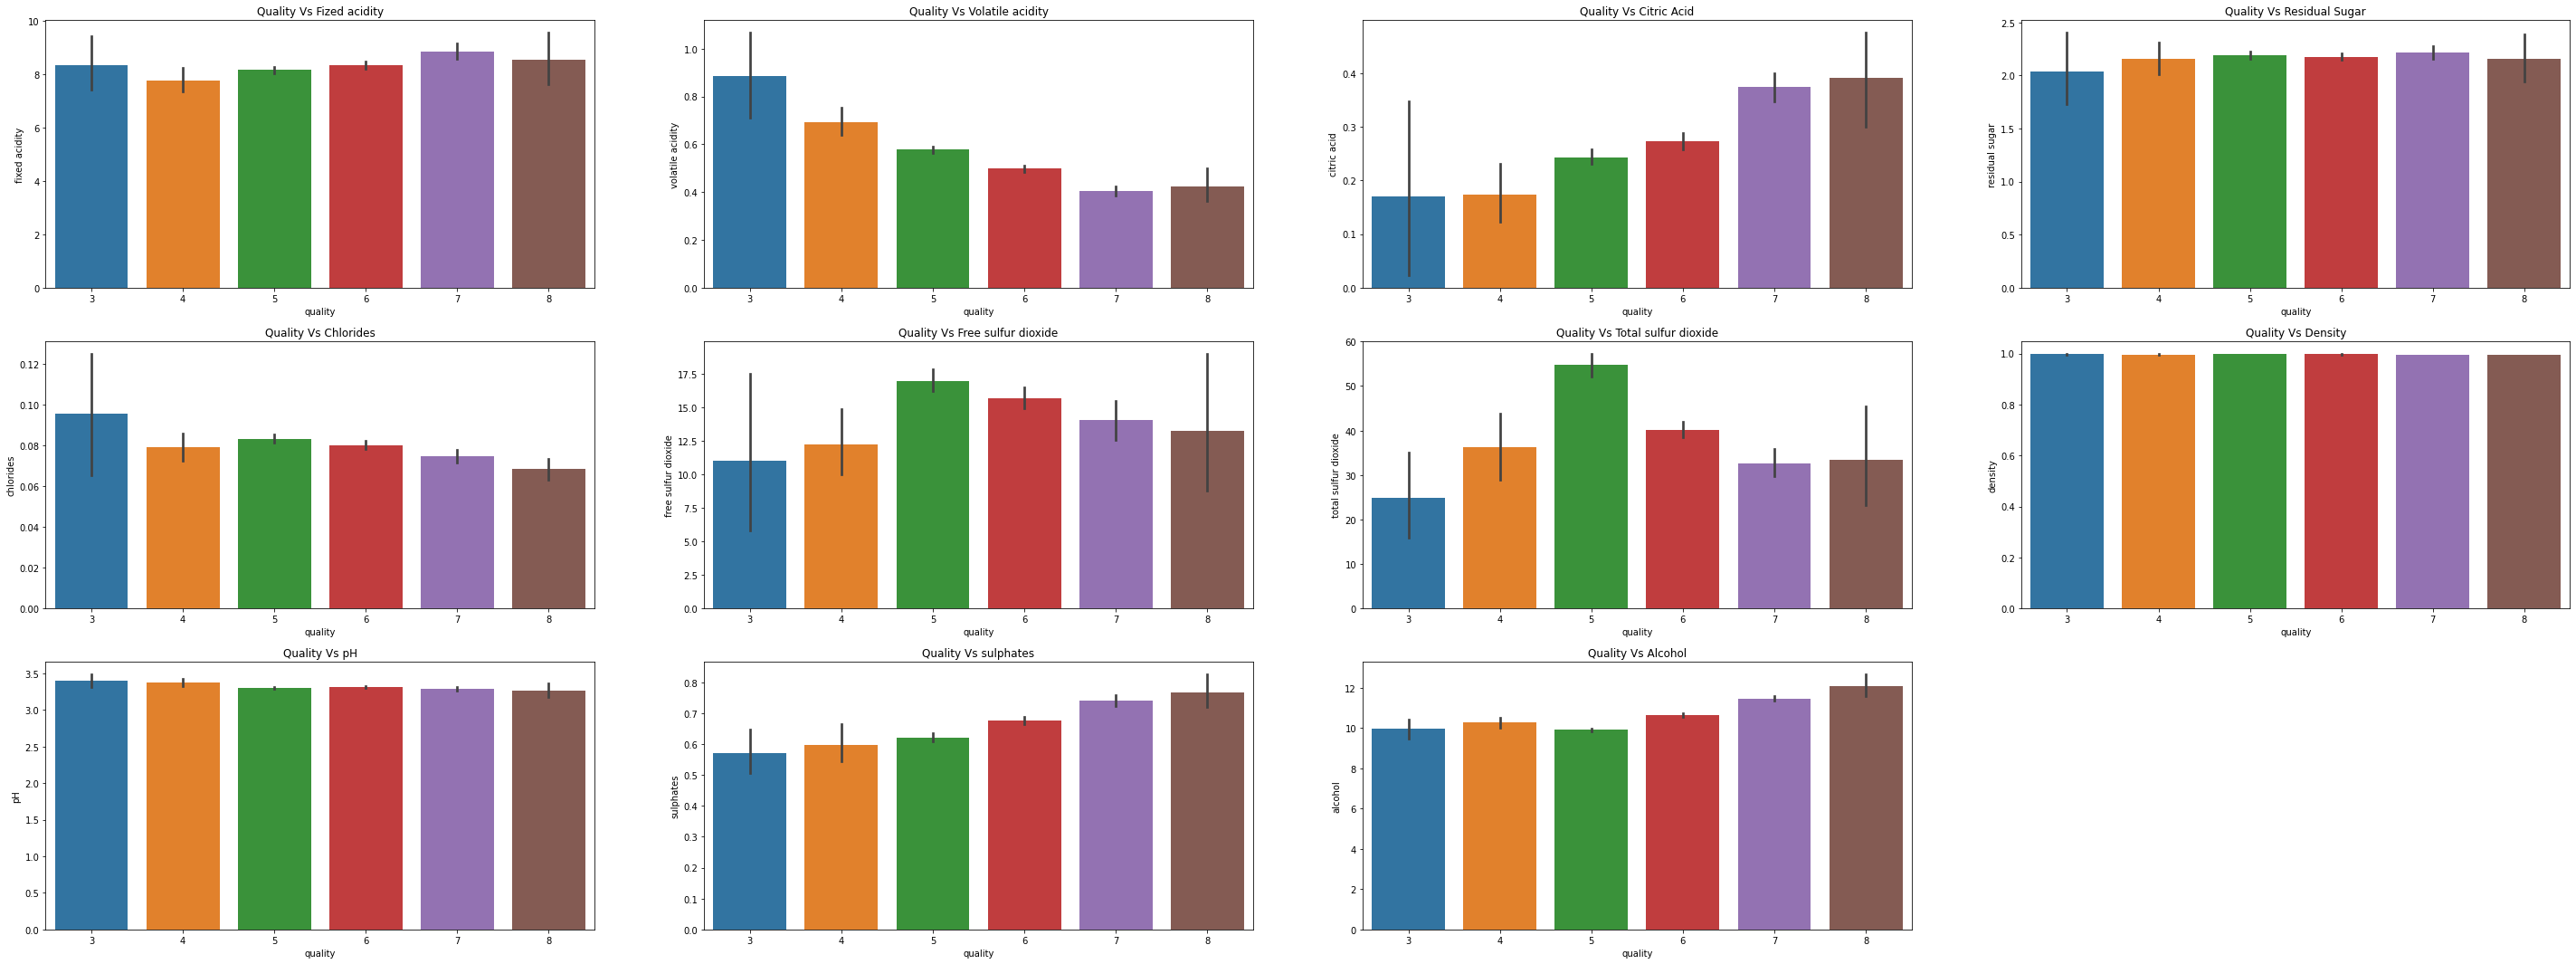

In [16]:
plt.figure(figsize=(50,25))
plt.subplot(4,4,1)
plt.title("Quality Vs Fized acidity")
sns.barplot(data=redwine_rev, x="quality", y="fixed acidity")

plt.subplot(4,4,2)
plt.title("Quality Vs Volatile acidity")
sns.barplot(data=redwine_rev, x="quality", y="volatile acidity")

plt.subplot(4,4,3)
plt.title("Quality Vs Citric Acid")
sns.barplot(data=redwine_rev, x="quality", y="citric acid")

plt.subplot(4,4,4)
plt.title("Quality Vs Residual Sugar")
sns.barplot(data=redwine_rev, x="quality", y="residual sugar")

plt.subplot(4,4,5)
plt.title("Quality Vs Chlorides")
sns.barplot(data=redwine_rev, x="quality", y="chlorides")

plt.subplot(4,4,6)
plt.title("Quality Vs Free sulfur dioxide")
sns.barplot(data=redwine_rev, x="quality", y="free sulfur dioxide")

plt.subplot(4,4,7)
plt.title("Quality Vs Total sulfur dioxide")
sns.barplot(data=redwine_rev, x="quality", y="total sulfur dioxide")

plt.subplot(4,4,8)
plt.title("Quality Vs Density")
sns.barplot(data=redwine_rev, x="quality", y="density")

plt.subplot(4,4,9)
plt.title("Quality Vs pH")
sns.barplot(data=redwine_rev, x="quality", y="pH")

plt.subplot(4,4,10)
plt.title("Quality Vs sulphates")
sns.barplot(data=redwine_rev, x="quality", y="sulphates")

plt.subplot(4,4,11)
plt.title("Quality Vs Alcohol")
sns.barplot(data=redwine_rev, x="quality", y="alcohol")
plt.show()

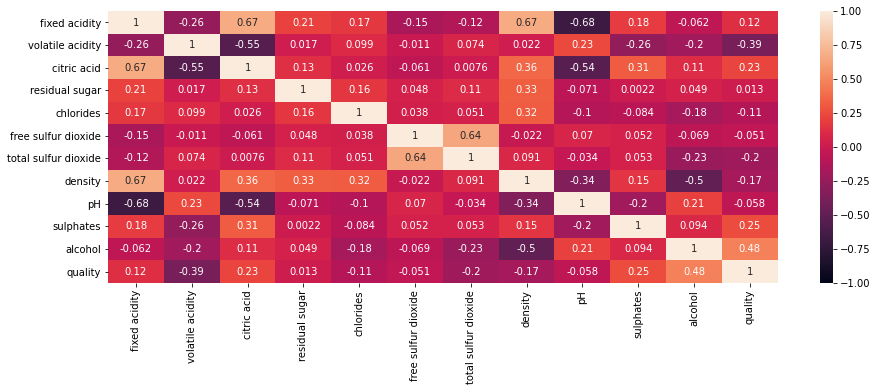

In [17]:
plt.figure(figsize=(15,5))
corr_df=redwine_rev.corr(method="pearson")
sns.heatmap(corr_df,vmax=1,vmin=-1.0,annot=True);

In [18]:
redwine_rev.quality=redwine_rev.quality.replace({3:"bad", 4:"bad", 5:"bad", 6:"good", 7:"good", 8:"good"})

In [19]:
redwine_rev.quality.value_counts()

good    855
bad     744
Name: quality, dtype: int64

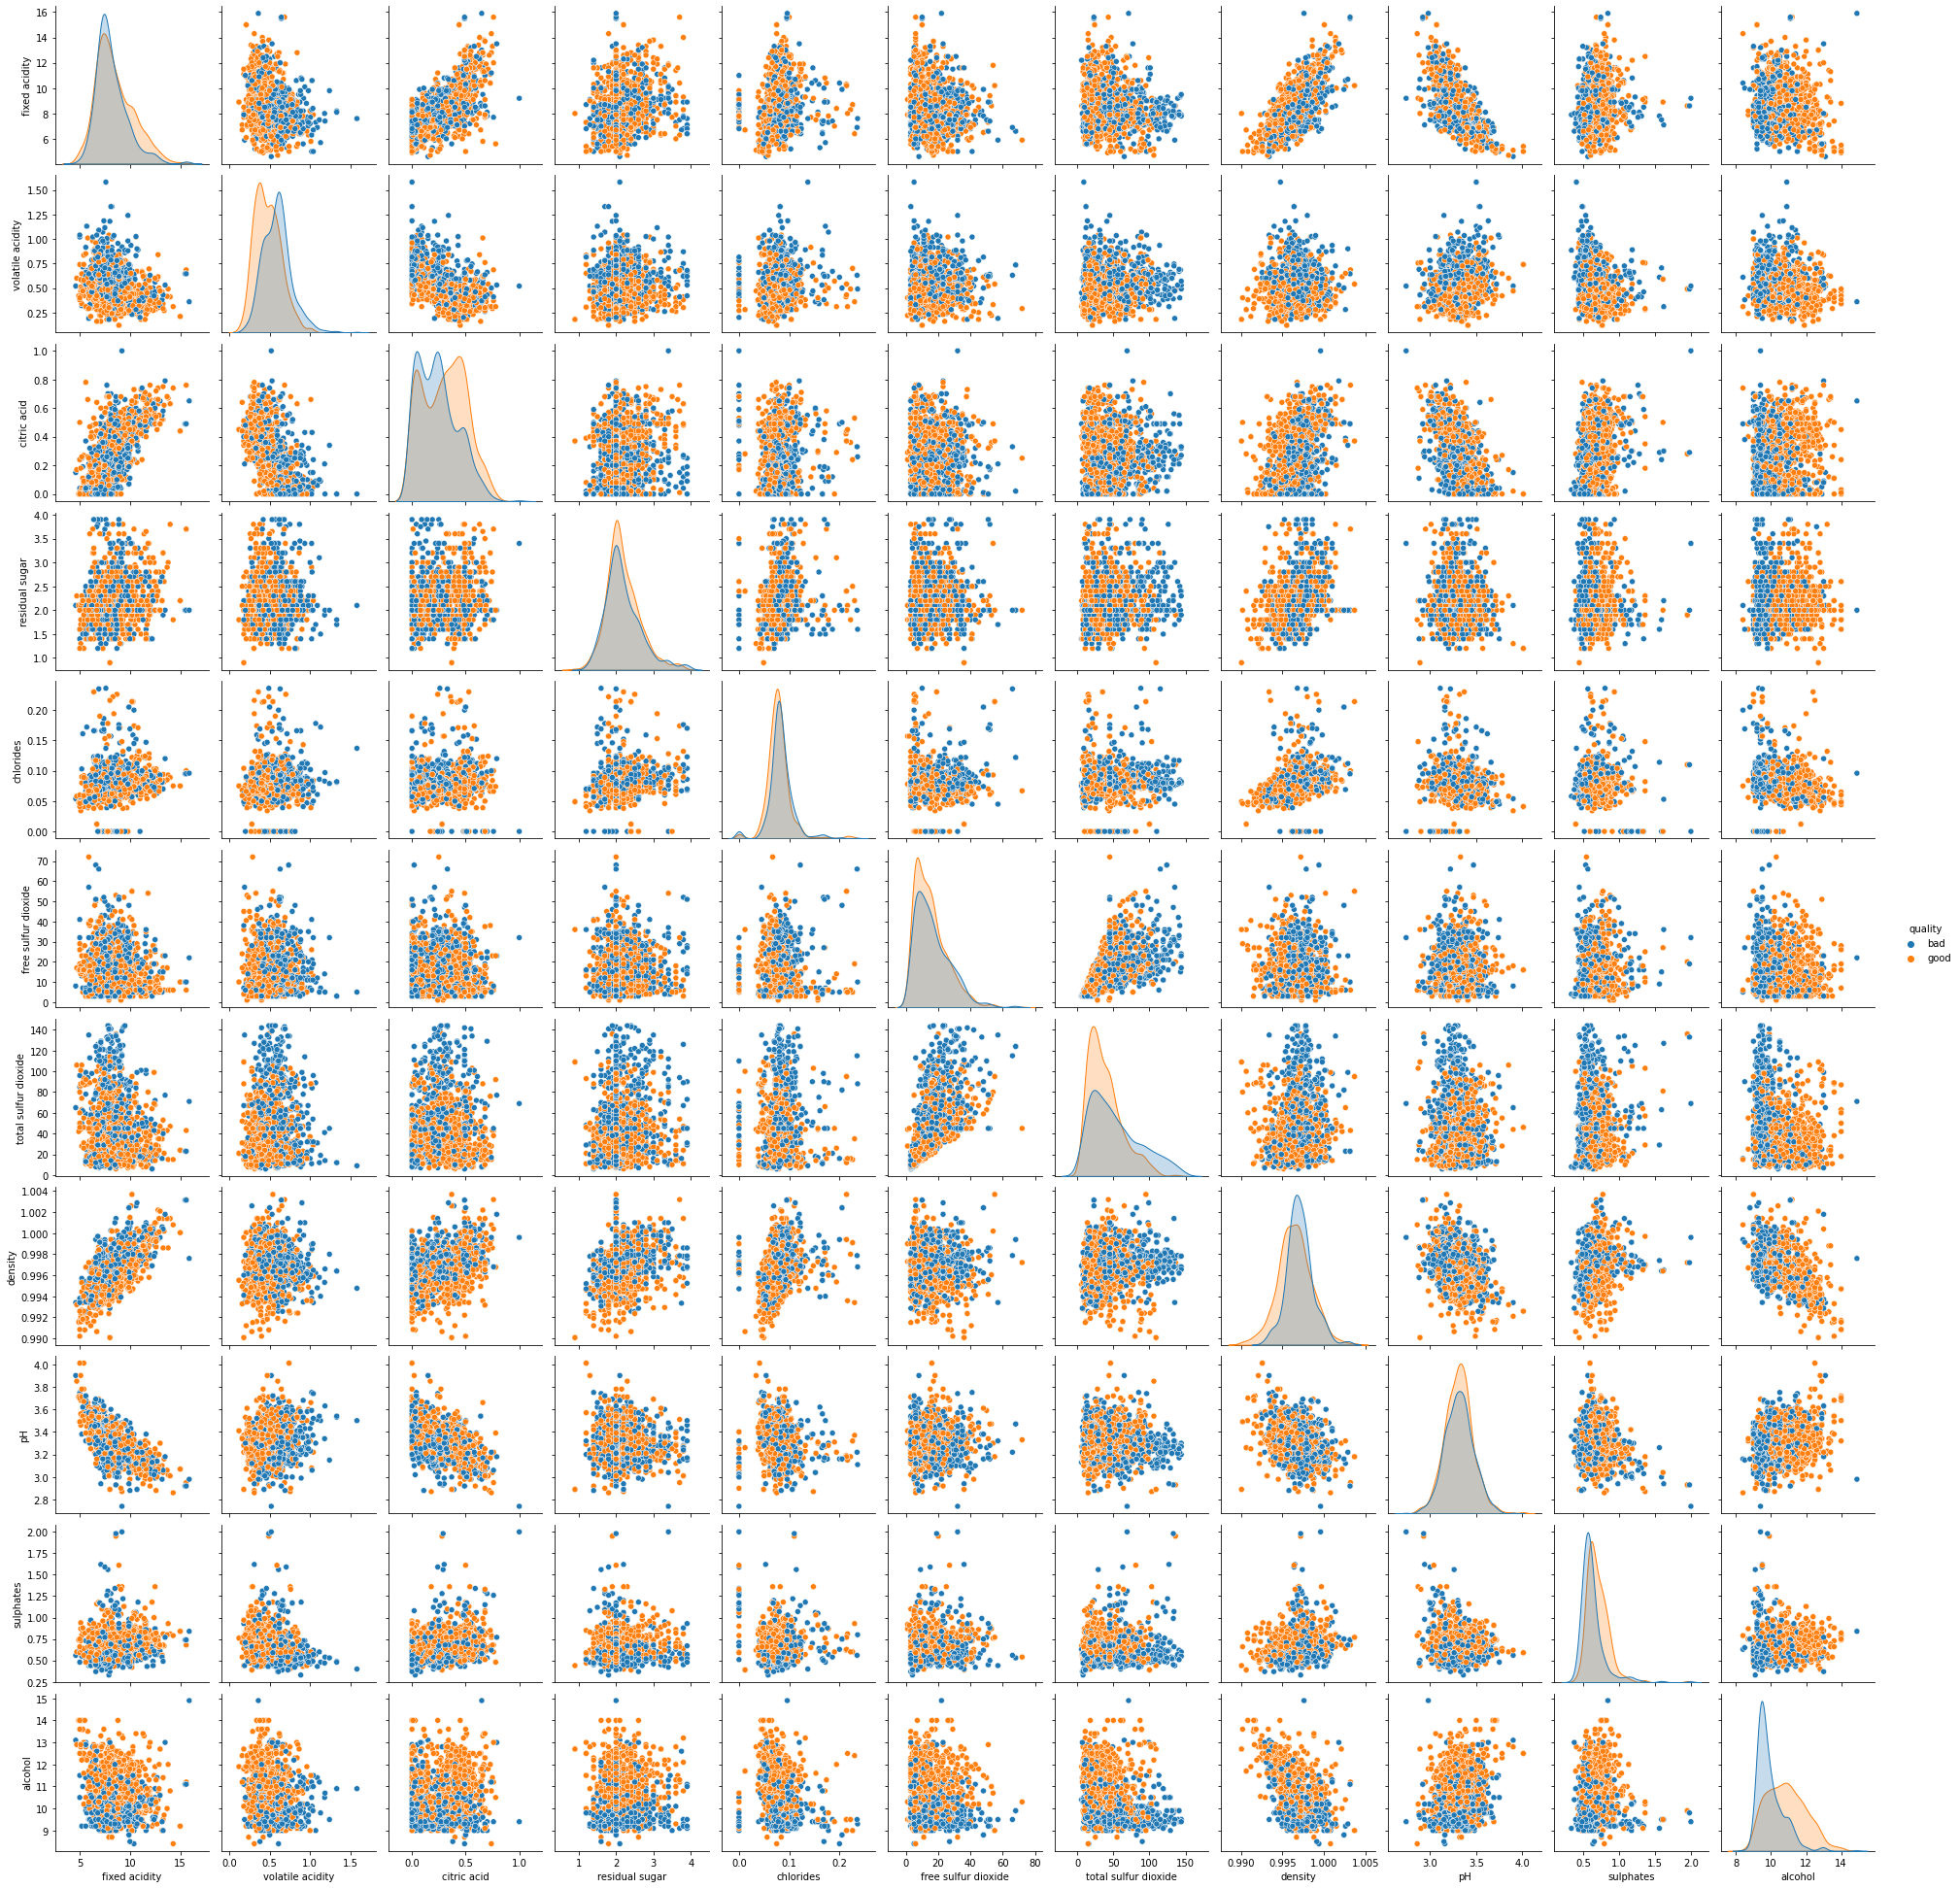

In [20]:
sns.pairplot(data=redwine_rev, hue="quality")

In [21]:
redwine_rev.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [22]:
le=LabelEncoder()

redwine_rev["quality"]=le.fit_transform(redwine_rev["quality"])

In [23]:
le_name_mapping=dict(zip(le.classes_, le.transform(le.classes_)))
print('Feature',"quality")
print('le_name_mapping', le_name_mapping)

Feature quality
le_name_mapping {'bad': 0, 'good': 1}


In [24]:
redwine_rev.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [25]:
X= redwine_rev.iloc[:,:-1]
Y= redwine_rev["quality"]
print(X.shape, Y.shape)

(1599, 11) (1599,)


In [26]:
scaler= StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-0.24109439 -1.27271396  2.10035914 ... -1.95099614 -0.87427191
   1.76190411]
 [-0.24109439 -1.27271396  2.10035914 ... -1.95099614 -0.87427191
   1.76190411]
 [-1.39015528 -1.32857872 -0.10771073 ...  0.12237286 -0.69723268
  -0.11544087]]


In [27]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=10)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1119, 11) (1119,) (480, 11) (480,)


#### Logistic Regression

In [28]:
model_log= LogisticRegression()
model_log.fit(X_train, Y_train)
LR=model_log.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, LR),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, LR),"\n")
print("Classification report\n", classification_report(Y_test, LR),"\n")

Accuracy score:
 0.73125 

Confusion matix:
 [[145  57]
 [ 72 206]] 

Classification report
               precision    recall  f1-score   support

           0       0.67      0.72      0.69       202
           1       0.78      0.74      0.76       278

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480
 



#### SGDClassifier

In [29]:
model_sgd= SGDClassifier(loss="log", random_state=10, alpha=0.01, max_iter=1000, shuffle=True, early_stopping=True, 
                        n_iter_no_change=3)
model_sgd.fit(X_train, Y_train)
SGD= model_sgd.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, SGD),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SGD),"\n")
print("Classification report\n", classification_report(Y_test, SGD),"\n")

Accuracy score:
 0.7354166666666667 

Confusion matix:
 [[143  59]
 [ 68 210]] 

Classification report
               precision    recall  f1-score   support

           0       0.68      0.71      0.69       202
           1       0.78      0.76      0.77       278

    accuracy                           0.74       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.74      0.74      0.74       480
 



#### Tune SGDClassifier

In [30]:
model_sgd= SGDClassifier(loss="log", random_state=10, alpha=0.01, max_iter=1000, shuffle=True, early_stopping=True, 
                        n_iter_no_change=10)
model_sgd.fit(X_train, Y_train)
SGD= model_sgd.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, SGD),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SGD),"\n")
print("Classification report\n", classification_report(Y_test, SGD),"\n")

Accuracy score:
 0.7395833333333334 

Confusion matix:
 [[141  61]
 [ 64 214]] 

Classification report
               precision    recall  f1-score   support

           0       0.69      0.70      0.69       202
           1       0.78      0.77      0.77       278

    accuracy                           0.74       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.74      0.74      0.74       480
 



#### KNN

In [31]:
model_KNN= KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), metric="euclidean")
model_KNN.fit(X_train, Y_train)
KNN= model_KNN.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, KNN),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, KNN),"\n")
print("Classification report\n", classification_report(Y_test, KNN),"\n")

Accuracy score:
 0.7104166666666667 

Confusion matix:
 [[134  68]
 [ 71 207]] 

Classification report
               precision    recall  f1-score   support

           0       0.65      0.66      0.66       202
           1       0.75      0.74      0.75       278

    accuracy                           0.71       480
   macro avg       0.70      0.70      0.70       480
weighted avg       0.71      0.71      0.71       480
 



In [32]:
int(np.sqrt(len(X_train)))

33

#### Tune KNN

In [33]:
model_KNN_tune= KNeighborsClassifier(n_neighbors=101, metric="euclidean")
model_KNN_tune.fit(X_train, Y_train)
KNN_tune= model_KNN_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, KNN_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, KNN_tune),"\n")
print("Classification report\n", classification_report(Y_test, KNN_tune),"\n")

Accuracy score:
 0.7520833333333333 

Confusion matix:
 [[147  55]
 [ 64 214]] 

Classification report
               precision    recall  f1-score   support

           0       0.70      0.73      0.71       202
           1       0.80      0.77      0.78       278

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480
 



#### SVC

In [34]:
model_svm= SVC(kernel='rbf', C=1, gamma=0.01)
model_svm.fit(X_train, Y_train)
SVM= model_svm.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, SVM),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SVM),"\n")
print("Classification report\n", classification_report(Y_test, SVM),"\n")

Accuracy score:
 0.7375 

Confusion matix:
 [[158  44]
 [ 82 196]] 

Classification report
               precision    recall  f1-score   support

           0       0.66      0.78      0.71       202
           1       0.82      0.71      0.76       278

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.75      0.74      0.74       480
 



#### Tune SVC

In [35]:
model_svm_tune= SVC(kernel='rbf', C=280, gamma=0.001)
model_svm_tune.fit(X_train, Y_train)
SVM_tune= model_svm_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, SVM_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, SVM_tune),"\n")
print("Classification report\n", classification_report(Y_test, SVM_tune),"\n")

Accuracy score:
 0.7541666666666667 

Confusion matix:
 [[157  45]
 [ 73 205]] 

Classification report
               precision    recall  f1-score   support

           0       0.68      0.78      0.73       202
           1       0.82      0.74      0.78       278

    accuracy                           0.75       480
   macro avg       0.75      0.76      0.75       480
weighted avg       0.76      0.75      0.76       480
 



#### DecisionTree Classifier

In [36]:
model_DT= DecisionTreeClassifier(criterion="gini", splitter="best", random_state=10)
model_DT.fit(X_train, Y_train)
DT= model_DT.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, DT),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, DT),"\n")
print("Classification report\n", classification_report(Y_test, DT),"\n")

Accuracy score:
 0.7270833333333333 

Confusion matix:
 [[145  57]
 [ 74 204]] 

Classification report
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       202
           1       0.78      0.73      0.76       278

    accuracy                           0.73       480
   macro avg       0.72      0.73      0.72       480
weighted avg       0.73      0.73      0.73       480
 



#### Tune DecisionTree Classifier

In [37]:
model_DT_tune= DecisionTreeClassifier(criterion="gini", splitter="best", random_state=10, min_samples_leaf=1, 
                                      min_samples_split=3)
model_DT_tune.fit(X_train, Y_train)
DT_tune= model_DT_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, DT_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, DT_tune),"\n")
print("Classification report\n", classification_report(Y_test, DT_tune),"\n")

Accuracy score:
 0.7229166666666667 

Confusion matix:
 [[146  56]
 [ 77 201]] 

Classification report
               precision    recall  f1-score   support

           0       0.65      0.72      0.69       202
           1       0.78      0.72      0.75       278

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.73      0.72      0.72       480
 



#### ExtraTrees Classifier

In [38]:
model_EXT= ExtraTreesClassifier(n_estimators=100, random_state=10)
model_EXT.fit(X_train,Y_train)
EXT= model_EXT.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, EXT),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EXT),"\n")
print("Classification report\n", classification_report(Y_test, EXT),"\n")

Accuracy score:
 0.8104166666666667 

Confusion matix:
 [[160  42]
 [ 49 229]] 

Classification report
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       202
           1       0.85      0.82      0.83       278

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480
 



#### Tune ExtraTrees Classifier

In [39]:
model_EXT_tune= ExtraTreesClassifier(n_estimators=108, random_state=10)
model_EXT_tune.fit(X_train,Y_train)
EXT= model_EXT_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, EXT),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EXT),"\n")
print("Classification report\n", classification_report(Y_test, EXT),"\n")

Accuracy score:
 0.8166666666666667 

Confusion matix:
 [[163  39]
 [ 49 229]] 

Classification report
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       202
           1       0.85      0.82      0.84       278

    accuracy                           0.82       480
   macro avg       0.81      0.82      0.81       480
weighted avg       0.82      0.82      0.82       480
 



#### RandomForest Classifier

In [40]:
model_RF= RandomForestClassifier(n_estimators=100, random_state=10)
model_RF.fit(X_train,Y_train)
RF= model_RF.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, RF),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, RF),"\n")
print("Classification report\n", classification_report(Y_test, RF),"\n")

Accuracy score:
 0.8020833333333334 

Confusion matix:
 [[165  37]
 [ 58 220]] 

Classification report
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       202
           1       0.86      0.79      0.82       278

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.81      0.80      0.80       480
 



#### Tune RandomForest Classifier

In [53]:
model_RF_tune= RandomForestClassifier(n_estimators=200, random_state=7)
model_RF_tune.fit(X_train,Y_train)
RF_tune= model_RF_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, RF_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, RF_tune),"\n")
print("Classification report\n", classification_report(Y_test, RF_tune),"\n")

Accuracy score:
 0.81875 

Confusion matix:
 [[167  35]
 [ 52 226]] 

Classification report
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       202
           1       0.87      0.81      0.84       278

    accuracy                           0.82       480
   macro avg       0.81      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480
 



#### AdaBoost Classifier

In [42]:
model_AB= AdaBoostClassifier(n_estimators=100, random_state=10)
model_AB.fit(X_train,Y_train)
AB= model_AB.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, AB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, AB),"\n")
print("Classification report\n", classification_report(Y_test, AB),"\n")

Accuracy score:
 0.7291666666666666 

Confusion matix:
 [[142  60]
 [ 70 208]] 

Classification report
               precision    recall  f1-score   support

           0       0.67      0.70      0.69       202
           1       0.78      0.75      0.76       278

    accuracy                           0.73       480
   macro avg       0.72      0.73      0.72       480
weighted avg       0.73      0.73      0.73       480
 



#### Tune AdaBoost Classifier

In [43]:
model_AB_tune= AdaBoostClassifier(n_estimators=300, random_state=10)
model_AB_tune.fit(X_train,Y_train)
AB_tune= model_AB_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, AB_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, AB_tune),"\n")
print("Classification report\n", classification_report(Y_test, AB_tune),"\n")

Accuracy score:
 0.7625 

Confusion matix:
 [[150  52]
 [ 62 216]] 

Classification report
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       202
           1       0.81      0.78      0.79       278

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.76      0.76      0.76       480
 



#### GradientBoosting Classifier

In [44]:
model_GB= GradientBoostingClassifier(n_estimators=100, random_state=10)
model_GB.fit(X_train,Y_train)
GB= model_GB.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, GB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, GB),"\n")
print("Classification report\n", classification_report(Y_test, GB),"\n")

Accuracy score:
 0.7791666666666667 

Confusion matix:
 [[163  39]
 [ 67 211]] 

Classification report
               precision    recall  f1-score   support

           0       0.71      0.81      0.75       202
           1       0.84      0.76      0.80       278

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.79      0.78      0.78       480
 



#### Tune GradientBoosting Classifier

In [45]:
model_GB_tune= GradientBoostingClassifier(n_estimators=300, random_state=10)
model_GB_tune.fit(X_train,Y_train)
GB_tune= model_GB_tune.predict(X_test)

print("Accuracy score:\n", accuracy_score(Y_test, GB_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, GB_tune),"\n")
print("Classification report\n", classification_report(Y_test, GB_tune),"\n")

Accuracy score:
 0.8083333333333333 

Confusion matix:
 [[161  41]
 [ 51 227]] 

Classification report
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       202
           1       0.85      0.82      0.83       278

    accuracy                           0.81       480
   macro avg       0.80      0.81      0.80       480
weighted avg       0.81      0.81      0.81       480
 



#### XGB Classifier

In [46]:
model_XGB= XGBClassifier(n_estimators=100,random_state=10)
model_XGB.fit(X_train,Y_train)
XGB=model_XGB.predict(X_test)

print()
print("Accuracy score:\n", accuracy_score(Y_test, XGB),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, XGB),"\n")
print("Classification report\n", classification_report(Y_test, XGB),"\n")

[18:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy score:
 0.7958333333333333 

Confusion matix:
 [[164  38]
 [ 60 218]] 

Classification report
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       202
           1       0.85      0.78      0.82       278

    accuracy                           0.80       480
   macro avg       0.79      0.80      0.79       480
weighted avg       0.80      0.80      0.80       480
 



#### Tune XGB Classifier

In [47]:
model_XGB_tune= XGBClassifier(n_estimators=101,random_state=10)
model_XGB_tune.fit(X_train,Y_train)
XGB_tune=model_XGB_tune.predict(X_test)

print()
print("Accuracy score:\n", accuracy_score(Y_test, XGB_tune),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, XGB_tune),"\n")
print("Classification report\n", classification_report(Y_test, XGB_tune),"\n")

[18:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy score:
 0.8 

Confusion matix:
 [[164  38]
 [ 58 220]] 

Classification report
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       202
           1       0.85      0.79      0.82       278

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480
 



#### Ensemble modelling

In [48]:
estimators = []

# model1 = KNeighborsClassifier(n_neighbors=101, metric="euclidean")
# estimators.append(('KNN', model1))
                  
# model2 = SVC(kernel='rbf', C=280, gamma=0.001)
# estimators.append(('SVC', model2))

# model3 = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=10)
# estimators.append(('DT', model3))

model4 = ExtraTreesClassifier(n_estimators=108, random_state=10)
estimators.append(('EXT', model4))

model5 = RandomForestClassifier(n_estimators=200, random_state=7)
estimators.append(('RT', model5))

model6 = AdaBoostClassifier(n_estimators=300, random_state=10)
estimators.append(('AB', model6))                  
                  
model7 = GradientBoostingClassifier(n_estimators=300, random_state=10)
estimators.append(('GB', model7))

model8 = XGBClassifier(n_estimators=101,random_state=10)
estimators.append(('XG', model8))

# create the ensemble model
model_ensemble = VotingClassifier(estimators)
model_ensemble.fit(X_train,Y_train)
EM=model_ensemble.predict(X_test)

print()
print("Accuracy score:\n", accuracy_score(Y_test, EM),"\n")
print("Confusion matix:\n", confusion_matrix(Y_test, EM),"\n")
print("Classification report\n", classification_report(Y_test, EM),"\n")

[18:45:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy score:
 0.825 

Confusion matix:
 [[166  36]
 [ 48 230]] 

Classification report
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       202
           1       0.86      0.83      0.85       278

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.83      0.82      0.83       480
 



#### KFold Validation

In [52]:
# model_ensemble = VotingClassifier(estimators)
# model_EXT_tune= ExtraTreesClassifier(n_estimators=108, random_state=10)
model_RF_tune= RandomForestClassifier(n_estimators=200, random_state=7)

#performing kfold_cross_validation
kfold_cv=KFold(n_splits=10,random_state=10)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=model_RF_tune, X=X_train, y=Y_train, cv=kfold_cv)
print()
print(kfold_cv_result)

#finding the mean
print()
print(kfold_cv_result.mean())


[0.80357143 0.82142857 0.82142857 0.73214286 0.83035714 0.83035714
 0.79464286 0.77678571 0.84821429 0.84684685]

0.8105775418275417


In [54]:
pickle.dump(model_RF_tune,open("red_RF.pkl","wb"))